In [1]:
import numpy as np
import numpy.linalg as la
import scipy.linalg as sla

In [2]:
A=[[1,2],[2,3]]

In [32]:
n=len(A)
Ai=la.inv(A)

In [33]:
x_0=np.random.rand(n,1)
x_0=x_0/la.norm(x_0)

In [41]:
x_k=x_0
for i in range(10000):
    x_k=Ai@x_k
    x_k=x_k/la.norm(x_k)

In [42]:
eigvec=x_k.reshape(n)
eigval=float((x_k.T@A@x_k)/(x_k.T@x_k))

In [43]:
eigval

-0.23606797749978972

In [44]:
import matplotlib.pyplot as plt

In [3]:
As=[[[ 2.16142967e+03,-4.21076180e+03],
  [ 1.05515493e+03,-2.05549354e+03]],
 [[-3.41306577e+01,9.00931276e+01],
  [-5.75973457e+01,1.41566787e+02]],
 [[ 1.43099846e+02,-1.30999302e+02],
  [ 4.12382359e+01,-3.41637170e+01]]]

In [4]:
n=len(As)
x_0=np.array([1/2**0.5,1/2**0.5])

Text(0.5, 1.0, 'cnt_v_ratios')

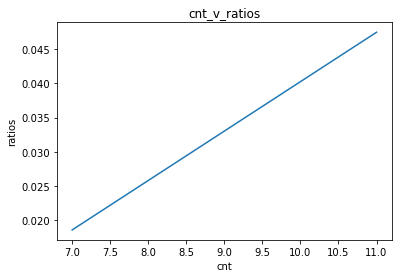

In [45]:
import numpy as np
import scipy.linalg as sla
import matplotlib.pyplot as plt
eigenval1=[]
eigenvec1=[]
cnt=[]
n=len(As)
for i in range(n):
    A=As[i]
    x_k=x_0
    x_kp1=A@x_k
    x_kp1=x_kp1/np.linalg.norm(x_kp1,2)
    m=1.0
    while np.linalg.norm(x_kp1-x_k,2)>10.**(-12):
        x_k=x_kp1
        x_kp1=A@x_kp1
        m+=1.
        x_kp1=x_kp1/np.linalg.norm(x_kp1,2)
    cnt.append(m)
    eigenvec1.append(x_kp1)
    eigenval1.append(float((x_kp1.T@A@x_kp1)/(x_kp1.T@x_kp1)))
eigenval2=[]
eigenvec2=[]
for i in range(n):
    A=As[i]
    P,L,U=sla.lu(A)
    x_k=x_0
    y=sla.solve_triangular(L,P.T@x_k,lower=True)#默认使用上三角
    x_kp1=sla.solve_triangular(U,y,lower=False)
    x_kp1=x_kp1/np.linalg.norm(x_kp1,2)
    while np.linalg.norm(x_kp1-x_k,2)>10.**(-12):
        x_k=x_kp1
        y=sla.solve_triangular(L,P.T@x_kp1,lower=True)
        x_kp1=sla.solve_triangular(U,y,lower=False)
        x_kp1=x_kp1/np.linalg.norm(x_kp1,2)
    eigenvec2.append(x_kp1)
    eigenval2.append(float((x_kp1.T@A@x_kp1)/(x_kp1.T@x_kp1)))
m=len(x_0)
I=np.array([0.]*(m**2)).reshape(m,m)
for i in range(m):
    I[i,i]=1.0
shifted_eigval=[]
shifted_eigvec=[]
for i in range(n):
    A=As[i]-I
    P,L,U=sla.lu(A)
    x_k=x_0
    y=sla.solve_triangular(L,P.T@x_k,lower=True)
    x_kp1=sla.solve_triangular(U,y,lower=False)
    x_kp1=x_kp1/np.linalg.norm(x_kp1,2)
    for j in range(500):
        x_k=x_kp1
        y=sla.solve_triangular(L,P.T@x_k,lower=True)
        x_kp1=sla.solve_triangular(U,y,lower=False)
        x_kp1=x_kp1/np.linalg.norm(x_kp1,2)
    shifted_eigvec.append(x_kp1)
    shifted_eigval.append(float((x_kp1.T@(A+I)@x_kp1)/(x_kp1.T@x_kp1)))
eigenval1=np.array(eigenval1)
eigenval2=np.array(eigenval2)
eigenvec1=np.array(eigenvec1)
eigenvec2=np.array(eigenvec2)
shifted_eigval=np.array(shifted_eigval)
shifted_eigvec=np.array(shifted_eigvec)
cnt=np.array(cnt)
ratios=abs(eigenval2/eigenval1)
plt.plot(cnt,ratios)
plt.xlabel('cnt')
plt.ylabel('ratios')
plt.title('cnt_v_ratios')

In [47]:
As[0]-I

array([[ 2160.42967, -4210.7618 ],
       [ 1055.15493, -2056.49354]])

In [44]:
shifted_eigval

array([0.93604139, 2.43612949, 3.93612962])